   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  E

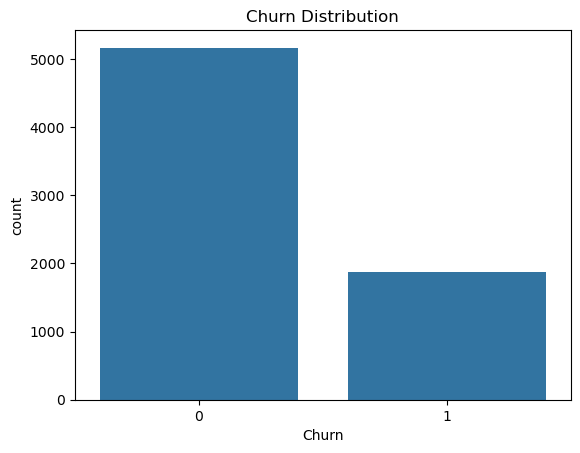

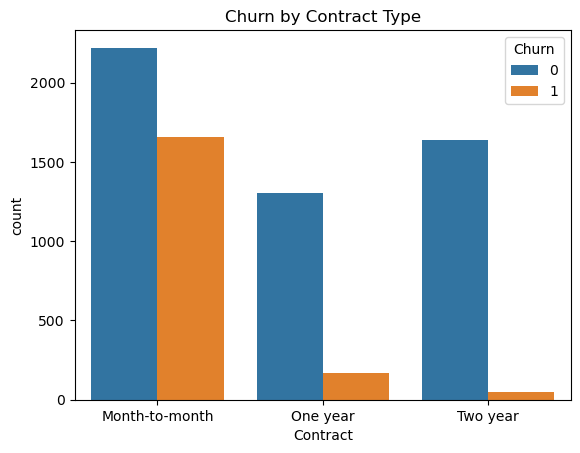

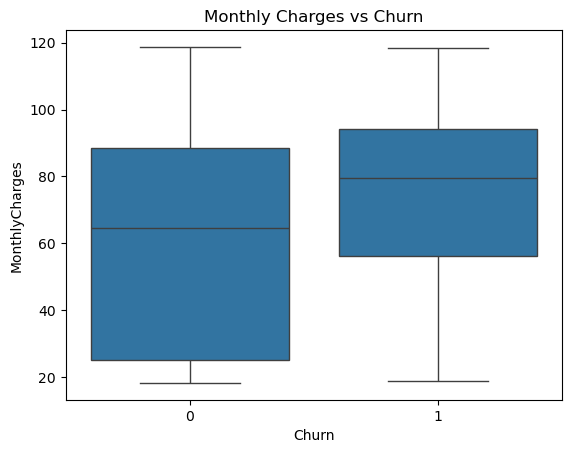

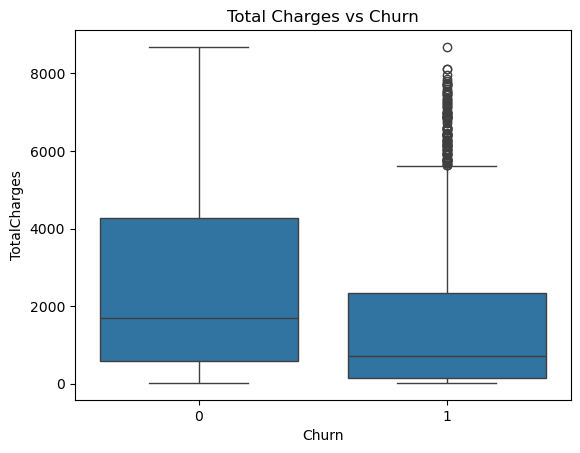

Features shape: (7032, 30)
Target shape: (7032,)
Train shape: (5625, 30)
Test shape: (1407, 30)
Logistic Regression Accuracy: 0.8038379530916845
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



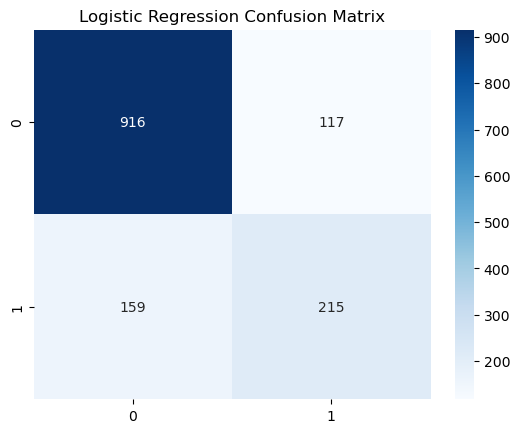

Random Forest Accuracy: 0.7867803837953091
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



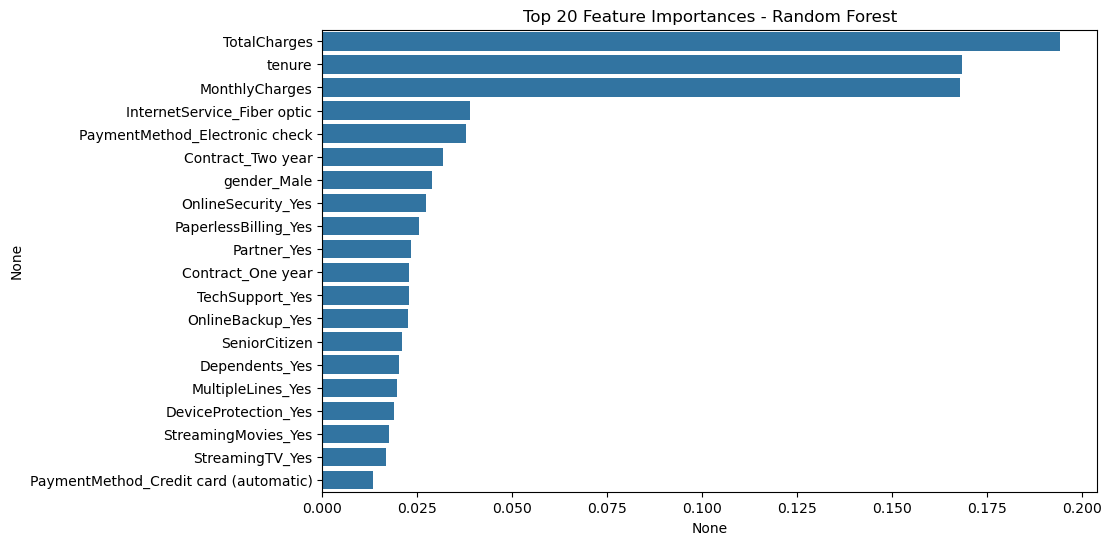

In [3]:
# -----------------------------
# 1️⃣ Import Libraries
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -----------------------------
# 2️⃣ Load Dataset
# -----------------------------
df = pd.read_csv(r"C:\Users\bagul\Downloads\projects_data\WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Strip column names
df.columns = df.columns.str.strip()

# Preview
print(df.head(3))



# -----------------------------
# 3️⃣ Convert numeric columns
# -----------------------------
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["MonthlyCharges"] = pd.to_numeric(df["MonthlyCharges"], errors="coerce")

# Map Churn Yes/No → 1/0
#df["Churn"] = df["Churn"].map({"Yes":1, "No":0})

# Drop any remaining NaNs in numeric columns
df = df.dropna(subset=["MonthlyCharges", "TotalCharges", "Churn"])

print(df.dtypes)


# -----------------------------
# 4️⃣ Exploratory Data Analysis (EDA)
# -----------------------------
# Churn distribution
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()
# Expected: 0 > 1 (more non-churn customers)

# Churn by Contract Type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn by Contract Type")
plt.show()
# Expected: Month-to-month contract has highest churn

# Monthly Charges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()
# Expected: Churned customers have slightly higher MonthlyCharges
# TotalCharges vs Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title("Total Charges vs Churn")
plt.show()
# Expected: Longer tenure (higher TotalCharges) → less likely to churn



# -----------------------------
# 6️⃣ Preprocessing: Encode categorical columns
# -----------------------------
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Features & Target
X = df_encoded.drop(['customerID','Churn'], axis=1, errors='ignore')
y = df_encoded['Churn']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

# -----------------------------
# 7️⃣ Train/Test Split
# -----------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


# -----------------------------
# 8️⃣ Logistic Regression
# -----------------------------
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d", cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()



# -----------------------------
# 9️⃣ Random Forest
# -----------------------------
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Feature Importance
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)[:20]
plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Top 20 Feature Importances - Random Forest")
plt.show()


In [4]:
# List of categorical columns to encode (excluding 'customerID' and 'Churn')
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check shape
print("Encoded dataset shape:", df_encoded.shape)
df_encoded.head()


Encoded dataset shape: (7032, 32)


customerID  SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  \
0  7590-VHVEG              0       1           29.85         29.85      0   
1  5575-GNVDE              0      34           56.95       1889.50      0   
2  3668-QPYBK              0       2           53.85        108.15      1   
3  7795-CFOCW              0      45           42.30       1840.75      0   
4  9237-HQITU              0       2           70.70        151.65      1   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  ...  \
0        False         True           False             False  ...   
1         True        False           False              True  ...   
2         True        False           False              True  ...   
3         True        False           False             False  ...   
4        False        False           False              True  ...   

   StreamingTV_No internet service  StreamingTV_Yes  \
0                            False            False   
1                            False            False   
2                            False            False   
3                            False            False   
4                            False            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   

   Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
0              False              False                  True   
1               True              False                 False   
2              False              False                  True   
3               True              False                 False   
4              False              False                  True   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 32 columns]

In [5]:
print("Original columns:", df.columns.tolist())
print("Encoded columns:", df_encoded.columns.tolist())


Original columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
Encoded columns: ['customerID', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract

In [6]:
# EXPORT CLEAN DATASET FOR POWER BI (NO ENCODING)
df_clean = df.copy()

export_path_clean = r"C:\Users\bagul\Downloads\projects_data\Telco_Churn_Clean_for_PowerBI.csv"
df_clean.to_csv(export_path_clean, index=False)

print("✅ Clean dataset exported for Power BI:")
print(export_path_clean)


✅ Clean dataset exported for Power BI:
C:\Users\bagul\Downloads\projects_data\Telco_Churn_Clean_for_PowerBI.csv
